# Chapter 3.4 - Finding Product Factors and Prime Numbers using Qwhole

In this chapter we  will see how to apply Qwhole and quantum expressions to solve mathematical problems that would take classical computers long amounts of time to solve.

## Factorial

In the [Leap factoring demo] (https://github.com/dwave-examples/factoring) based on ["Boosting integer factoring performance via quantum annealing osets"](https://www.dwavesys.com/media/l0tjzis2/14-1002a_b_tr_boosting_integer_factorization_via_quantum_annealing_offsets.pdf) paper, the D-Wave system can be used to factor a whole number by running a multiplication circuit in reverse. The factoring demo shows how can be solved a [constraint satisfaction problem (CSP)]( https://docs.ocean.dwavesys.com/en/stable/concepts/csp.html) on a QAC. 

The quantum programming allow us to factor numbers in an entirely new way, by turning a multiplication operation into a constraint satisfaction problem that allows the quantum solver to compute inputs from a predefined output. To see this in action we will use unknown Qwhole variables p, q and r to calculate factors of positive number 42.

In [6]:
_42 = Qwhole("42_", 42); p = Qwhole(3, "p"); q = Qwhole(2, "q"); r = Qwhole(2, "r");
print(p, q, r)

p\3q:U\ q\2q:U\ r\2q:U\


The constraint satisfaction problem is defined by quantum assignment *m42* in the code cell below.

From the solutions we see that there are two possible combinations of multiplying numbers 7, 3, and 2 distributed amongst quantum variables *p*, *q* and *r* according to their defined capacities.

In [7]:
m42 = _42.assign(p * q * r);
print(m42.solve())

42_\7b:42\; _*1\5b:21\; p\3b:7\; q\2b:3\; r\2b:2\
42_\7b:42\; _*1\5b:14\; p\3b:7\; q\2b:2\; r\2b:3\



We can use D-Wave's *Hybrid* solver, to solve a complex factorial problem with increased number of q-bits, like in the following example.

In [8]:
Ml = Qwhole("M", 2775); pl = Qwhole(8, "p"); ql = Qwhole(8, "q");
print(pl, ql)

mMl = Ml.assign(pl * ql);

Solver.Activate("Hybrid")

print(mMl)
print(mMl.solve())

p\8q:U\ q\8q:U\
CONNECTED to hybrid_binary_quadratic_model_version2.
M\16q:2775\ = (p\8q:U\ * q\8q:U\)
M\16b:2775\; p\8b:37\; q\8b:75\



In [9]:
Xl = Qwhole("X", 369075); rl = Qwhole(8, "r");
print(pl, ql, rl)

mXl = Xl.assign(pl * ql * rl);

print(mXl)
print(mXl.solve())

p\8q:U\ q\8q:U\ r\8q:U\
X\24q:369075\ = ((p\8q:U\ * q\8q:U\) * r\8q:U\)
X\24b:369075\; _*4\16b:13625\; p\8b:125\; q\8b:109\; r\8b:75\



## Prime Numbers

We are going to study two different approaches to generate prime number candidates using quantum programming:
1. Prime numbers algorithms [within 1 of a multiple of 6](https://owlcation.com/stem/Every-Prime-Number-Larger-Than-3-is-1-Away-From-a-Multiple-of-6-A-Proof)
2. [The Triangular Theorem of the Primes](https://www.researchgate.net/publication/48210741_The_Triangular_Theorem_of_the_Primes_Binary_Quadratic_Forms_andPrimitive_Pythagorean_Triples) algoriths

### Prime numbers algorithms [within 1 of a Multiple of 6](https://owlcation.com/stem/Every-Prime-Number-Larger-Than-3-is-1-Away-From-a-Multiple-of-6-A-Proof)

Likely prime number, except 2 and 3, can be defined as:

> prime_candidate = 6 * n +/- 1; where n > 0 and n is a whole number

The solution set of quantum assignment *prime6p1* in the following code cell has numbers identified 1, 7, 13 and 19 as prime number candidates. Except for 1all the identified candidates are prime numbers.

In [10]:
prime = Qwhole(4, "p"); s = Qwhole(2, "s"); _6 = Qwhole("6_", 6);
prime6p1 = prime.assign(_6 * s + _1)

print(prime6p1)

Solver.Activate("dann5")
print(prime6p1.solve())

p\6q:U\ = ((6_\3q:6\ * s\2q:U\) + 1_\1q:1\)
p\6b:1\; _*6\5b:0\; 6_\3b:6\; s\2b:0\; 1_\1b:1\
p\6b:13\; _*6\5b:12\; 6_\3b:6\; s\2b:2\; 1_\1b:1\
p\6b:7\; _*6\5b:6\; 6_\3b:6\; s\2b:1\; 1_\1b:1\
p\6b:19\; _*6\5b:18\; 6_\3b:6\; s\2b:3\; 1_\1b:1\



Additionally, the quantum subtraction assignment *prime6m1* defined in the following cell will identify prime numbers 5 and 11.

In [11]:
prime6m1 = prime.assign(_6 * s - _1)

print(prime6m1)
print(prime6m1.toString(True).replace(";", ";\n"))

print(prime6m1.solve())

p\4q:U\ = ((6_\3q:6\ * s\2q:U\) - 1_\1q:1\)
_*70\0\ == ;
 _*70\0\ = 6_0\0\ & s0\S\ = p0\S\ .+ 1_0\1\;
 
p\4b:0\; _*7\5b:0\; 6_\3b:6\; s\2b:0\; 1_\1b:1\
p\4b:7\; _*7\5b:0\; 6_\3b:6\; s\2b:0\; 1_\1b:1\



- **Note**: Instead of the above *Qwole* substruction assignment *prime6m1* we can define an equivalent quantum expression *prime6m1Xpr* by using *EQUAL (==)* operator and *addition (+)* operations, as shown in the following code cell.

In [12]:
prime6m1Xpr = (prime + _1 == _6 * s)

print(prime6m1Xpr.solve())

_+224\5b:6\; p\4b:5\; 1_\1b:1\; _*8\5b:6\; 6_\3b:6\; s\2b:1\
_+224\5b:12\; p\4b:11\; 1_\1b:1\; _*8\5b:12\; 6_\3b:6\; s\2b:2\



### Prime numbers algorithms based on [The Triangular Theorem of the Primes](https://www.researchgate.net/publication/48210741_The_Triangular_Theorem_of_the_Primes_Binary_Quadratic_Forms_andPrimitive_Pythagorean_Triples)

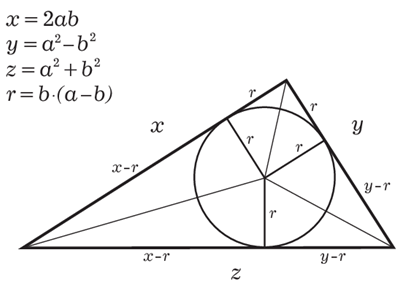

The binary quadratic forms of primitive Pythagorean triples is derived based on the diagram above and the prof and analysis are provided in "The Triangular Theorem of the Primes" paper. In short:
1. The hypotenuse, z, of a right triangle, with sides of integral (relatively prime) length, can be expressed as the sum of two squares, z=a^2+b^2, where a and b are positive integers of opposite parity such that a>b>0 and gcd(a,b)=1, 
2. Also, it has been shown that the sum of the two sides, x and y, can also be expressed as a binary quadratic form, x+y=(a+b)^2-2b^2. 
3. Similarly, when the radius of the inscribed circle is taken into account, r=b(a-b), a third binary quadratic form is found, namely (x+y)-4r=z-2r=(a-b)^2+2b^2. 

The three quadratic representations accommodate positive integers whose factorizations can only include primes p represented by the same type of binary quadratic forms, i.e. p=1,5(mod8), p=1,7(mod8), and p=1,3(mod8), respectively. For all three types of binary quadratic forms, when the positive integers represented are prime, such representations are unique. This implies that all odd primes can be geometrically incorporated into primitive Pythagorean triangles.

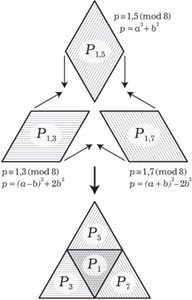

From the graphic representation of *The Triangular Theorem of the Primes* above, the paper defines follwing six binary quadratic forms:

$$
 prime = s^{2} + 2t^{2}, prime\ mod\ 8 = 3 
$$

$$
 prime = s^{2} + 4t^{2}, prime\ mod\ 8 = 5
$$

$$
 prime = s^{2} + 8t^{2}, prime\ mod\ 8 = 1
$$

$$
 prime = s^{2} + 16t^{2}, prime\ mod\ 8 = 1
$$

$$
 prime = s^{2} + 4st + 2t^{2}, prime\ mod\ 8 = 7
$$

$$
 prime = s^{2} + 8st + 8t^{2}, prime\ mod\ 8 = 1
$$

> where for each of the equations above
>
> 1. *s* and *t* are odd positive numbers, and 
> 
> 2. they do not have a common factor, i.e. thier *greatest common divisor (gcd)* is 1.

In the next code cell we are going to initialize quantum variables which will be used to define and solve the six equations with their respective conditions:

In [13]:
from dann5.d5 import Qblock, Qbin, Bits

prime = Qwhole(5, "p"); s = Qwhole(2, "s"); t = Qwhole(1, "t"); _2 = Qwhole("2_", 2);
_3 = Qbin("3_", Bits(3)); _7 = Qbin("7_", Bits(7));

The first equation:

$$
 prime = s^{2} + 2t^{2}
$$

is easly described using quantum assignment *p_s2_2t2* in the following code cell:

In [14]:
p_s2_2t2 = prime.assign(s * s + _2 * t * t);
print(p_s2_2t2)

p\5q:U\ = ((s\2q:U\ * s\2q:U\) + ((2_\2q:2\ * t\1q:U\) * t\1q:U\))


To define the condition:
$$
 prime\ mod\ 8 = 3 
$$

We are going to take advantage of the fact that any number divided by 8 will have in binary the last 3 digits same as its module.

> 8 binary is 0b1000, and the last 3 digits are 0b000 as its mod 8,
>
> 21 binary is 0b10101 with 0b101 or number 5, i.e. 12 mod 8 = 5
>
> 27 binary is 0b11011 with last 3 digits being 0b011, and 27 mod 8 is = 3

Knowing this, it is easy to define using *AND (&)* quantum bitwise operations in quantum assignment *p3mod8* in the following code cell:

In [15]:
p3mod8 = _3.assign(prime & _7);
print(p3mod8)

3_\5q:00011\ = (p\5q:U\ & 7_\3q:111\)


For positive numbers *s* and *t* to be odd means that:
$$
 s\ mod\ 2 = 1
$$
and 
$$
 t\ mod\ 2 = 1
$$

Knowing that any odd number in binarry form will have the 0 digit equal 1, we are defining these rules as quantum assignments *s1mod2* and *t1mod2* in the code cell below again using *AND (&)* quantum bitwise operation:

In [16]:
s1mod2 = Qbin(_1).assign(s & _1);
t1mod2 = Qbin(_1).assign(t & _1);
print(s1mod2, "\n", t1mod2)

1_\2q:01\ = (s\2q:U\ & 1_\1q:1\) 
 1_\1q:1\ = (t\1q:U\ & 1_\1q:1\)


For two positive numbers *s* and *t* not to have a common factor means that there are tree positive numbers *d*, *k* and *n*, such that:

> s = k * d, and
>
> t = n * d,, where
>
> d always have to be 1, and k is not equal n

So to define *gcd(s, t) = 1* rule we are using a quantum routine *gcd1* to describe it in the following code cell. The *Qrouine* allow as to name a block of quantum code.

In [17]:
from dann5.d5 import Qroutine
gcd1 = Qroutine("gcd(s, t) = 1"); # {
d = Qwhole(2, "d"); k = Qwhole(2, "k"); n = Qwhole(1, "n");
gcd1 = gcd1 << s.assign(k * d) << t.assign(n * d) << (d == _1) << (k != n);
# } gcd(s, t) = 1

print(gcd1)
print(gcd1.solve())

gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
}
 s\4b:2\; k\2b:2\; d\2b:1\ t\3b:0\; n\1b:0\; d\2b:1\ d\2b:1\; 1_\1b:1\ k\2b:2\ n\1b:0\ 
 s\4b:3\; k\2b:3\; d\2b:1\ t\3b:1\; n\1b:1\; d\2b:1\ d\2b:1\; 1_\1b:1\ k\2b:3\ n\1b:1\ 
 s\4b:1\; k\2b:1\; d\2b:1\ t\3b:0\; n\1b:0\; d\2b:1\ d\2b:1\; 1_\1b:1\ k\2b:1\ n\1b:0\ 
 s\4b:3\; k\2b:3\; d\2b:1\ t\3b:0\; n\1b:0\; d\2b:1\ d\2b:1\; 1_\1b:1\ k\2b:3\ n\1b:0\ 
 s\4b:2\; k\2b:2\; d\2b:1\ t\3b:1\; n\1b:1\; d\2b:1\ d\2b:1\; 1_\1b:1\ k\2b:2\ n\1b:1\ 
 s\4b:0\; k\2b:0\; d\2b:1\ t\3b:1\; n\1b:1\; d\2b:1\ d\2b:1\; 1_\1b:1\ k\2b:0\ n\1b:1\ 



To find the valid solutions for the first binary quadratic form based on *The Triangular Theorem of the Primes*, we have to put together all the described quantum assignments and quantum block together into a quantum program that is described by *primeNo*, which is a quantum block. To solve the quantum program, we are using D-Wave quantum annealer *Advatage2*.

In [19]:
primeNo = Qblock() << p_s2_2t2 << p3mod8 << s1mod2 << t1mod2 << gcd1;

from dann5.d5o import QuboCompiler, QuboAnalyzer
compiler = QuboCompiler()
primeNo.compile(compiler)
analyze = QuboAnalyzer(compiler.qubo())
print("number of nodes: {}, number of branches: {}".format(analyze.nodesNo(), analyze.branchesNo()))


print(primeNo)

Solver.Activate("Advantage2")
print(primeNo.solve())

number of nodes: 37, number of branches: 90
{
	p\5q:U\ = ((s\2q:U\ * s\2q:U\) + ((2_\2q:2\ * t\1q:U\) * t\1q:U\));
	3_\5q:00011\ = (p\5q:U\ & 7_\3q:111\);
	1_\2q:01\ = (s\2q:U\ & 1_\1q:1\);
	1_\1q:1\ = (t\1q:U\ & 1_\1q:1\);
	gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
};
}
CONNECTED to Advantage2_prototype2.3.
 p\5b:11\; _*9\4b:9\; s\2b:3\; s\2b:3\; _*11\4b:2\; _*10\3b:2\; 2_\2b:2\; t\1b:1\; t\1b:1\ 3_\5b:00011\; p\5b:11\; 7_\3b:111\ 1_\2b:01\; s\2b:3\; 1_\1b:1\ 1_\1b:1\; t\1b:1\; 1_\1b:1\ 



The second equation:

$$
 prime = s^{2} + 4t^{2}
$$

is defined using quantum assignment *p_s2_4t2*, and the condition:

$$
 prime\ mod\ 8 = 5 
$$

is defined using *p5mod8* quantum assignment in the following code cell:

In [20]:
_4 = Qwhole("4_", 4);

primeNo = Qblock(); #{
_5 = Qbin("5_", Bits(5));
p_s2_4t2 = prime.assign(s * s + _4 * t * t);
p5mod8 = _5.assign(prime & _7);

primeNo = primeNo << p_s2_4t2 << p5mod8 << s1mod2 << t1mod2 << gcd1;
# } primeNo Qblock
print(primeNo)
print(primeNo.solve())

{
	p\6q:U\ = ((s\2q:U\ * s\2q:U\) + ((4_\3q:4\ * t\1q:U\) * t\1q:U\));
	5_\5q:00101\ = (p\5q:U\ & 7_\3q:111\);
	1_\2q:01\ = (s\2q:U\ & 1_\1q:1\);
	1_\1q:1\ = (t\1q:U\ & 1_\1q:1\);
	gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
};
}
 p\6b:13\; _*14\4b:9\; s\2b:3\; s\2b:3\; _*16\5b:4\; _*15\4b:4\; 4_\3b:4\; t\1b:1\; t\1b:1\ 5_\5b:00101\; p\5b:13\; 7_\3b:111\ 1_\2b:01\; s\2b:3\; 1_\1b:1\ 1_\1b:1\; t\1b:1\; 1_\1b:1\ 



The third equation:

$$
 prime = s^{2} + 8t^{2}
$$

is defined using quantum assignment *p_s2_8t2*, and the condition:

$$
 prime\ mod\ 8 = 1 
$$

is defined using *p1mod8* quantum assignment in the following code cell:

In [21]:
_8 = Qwhole("8_", 8);

primeNo = Qblock(); #{
p_s2_8t2 = prime.assign(s * s + _8 * t * t);
p1mod8 = Qbin(_1).assign(prime & _7);

primeNo = primeNo << p_s2_8t2 << p1mod8 << s1mod2 << t1mod2 << gcd1;
# } primeNo Qblock
print(primeNo)
print(primeNo.solve())

{
	p\7q:U\ = ((s\2q:U\ * s\2q:U\) + ((8_\4q:8\ * t\1q:U\) * t\1q:U\));
	1_\5q:00001\ = (p\5q:U\ & 7_\3q:111\);
	1_\2q:01\ = (s\2q:U\ & 1_\1q:1\);
	1_\1q:1\ = (t\1q:U\ & 1_\1q:1\);
	gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
};
}
 p\7b:17\; _*17\4b:9\; s\2b:3\; s\2b:3\; _*19\6b:8\; _*18\5b:8\; 8_\4b:8\; t\1b:1\; t\1b:1\ 1_\5b:00001\; p\5b:17\; 7_\3b:111\ 1_\2b:01\; s\2b:3\; 1_\1b:1\ 1_\1b:1\; t\1b:1\; 1_\1b:1\ 



The forth equation:

$$
 prime = s^{2} + 16t^{2}
$$

is defined using quantum assignment *p_s2_16t2*, and the previously defined *p1mod8* quantum assignment is used in the following code cell:

In [22]:
_16 = Qwhole("16_", 16);

primeNo = Qblock(); #{
p_s2_16t2 = prime.assign(s * s + _16 * t * t);

primeNo = primeNo << p_s2_16t2 << p1mod8 << s1mod2 << t1mod2 << gcd1;
# } primeNo Qblock
print(primeNo)
print(primeNo.solve())

{
	p\8q:U\ = ((s\2q:U\ * s\2q:U\) + ((16_\5q:16\ * t\1q:U\) * t\1q:U\));
	1_\5q:00001\ = (p\5q:U\ & 7_\3q:111\);
	1_\2q:01\ = (s\2q:U\ & 1_\1q:1\);
	1_\1q:1\ = (t\1q:U\ & 1_\1q:1\);
	gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
};
}
 p\8b:25\; _*20\4b:9\; s\2b:3\; s\2b:3\; _*22\7b:16\; _*21\6b:16\; 16_\5b:16\; t\1b:1\; t\1b:1\ 1_\5b:00001\; p\5b:17\; 7_\3b:111\ 1_\2b:01\; s\2b:3\; 1_\1b:1\ 1_\1b:1\; t\1b:1\; 1_\1b:1\ 



The fifth equation:

$$
 prime = s^{2} + 4st + 2t^{2}
$$

is defined using quantum assignment *p_s2_4st_2t2*, and the condition:

$$
 prime\ mod\ 8 = 7 
$$

is defined using *p7mod8* quantum assignment in the following code cell:

In [23]:
primeNo = Qblock(); #{
p_s2_4st_2t2 = prime.assign(s * s + _4 * s * t + _2 * t * t);
p7mod8 = Qbin(_7).assign(prime & _7);

primeNo = primeNo << p_s2_4st_2t2 << p7mod8 << s1mod2 << t1mod2 << gcd1;
# } primeNo Qblock
print(primeNo)
print(primeNo.solve())

{
	p\7q:U\ = (((s\2q:U\ * s\2q:U\) + ((4_\3q:4\ * s\2q:U\) * t\1q:U\)) + ((2_\2q:2\ * t\1q:U\) * t\1q:U\));
	7_\5q:00111\ = (p\5q:U\ & 7_\3q:111\);
	1_\2q:01\ = (s\2q:U\ & 1_\1q:1\);
	1_\1q:1\ = (t\1q:U\ & 1_\1q:1\);
	gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
};
}
 p\7b:23\; _+244\7b:117\; _*23\4b:9\; s\2b:3\; s\2b:3\; _*25\6b:12\; _*24\5b:12\; 4_\3b:4\; s\2b:3\; t\1b:1\; _*27\4b:2\; _*26\3b:2\; 2_\2b:2\; t\1b:1\; t\1b:1\ 7_\5b:00111\; p\5b:23\; 7_\3b:111\ 1_\2b:01\; s\2b:3\; 1_\1b:1\ 1_\1b:1\; t\1b:1\; 1_\1b:1\ 



And finally, the sixth equation:

$$
 prime = s^{2} + 8st + 8t^{2}
$$

is defined using quantum assignment *p_s2_8st_8t2*, and we are reusing the previously defined *p1mod8* quantum assignment in the following code cell:

In [24]:
primeNo = Qblock(); #{
p_s2_8st_8t2 = prime.assign(s * s + _8 * s * t + _8 * t * t);

primeNo = primeNo << p_s2_8st_8t2 << p1mod8 << s1mod2 << t1mod2 << gcd1;
# } primeNo Qblock
print(primeNo)

Solver.Activate("Advantage2")

print(primeNo.solve())

{
	p\8q:U\ = (((s\2q:U\ * s\2q:U\) + ((8_\4q:8\ * s\2q:U\) * t\1q:U\)) + ((8_\4q:8\ * t\1q:U\) * t\1q:U\));
	1_\5q:00001\ = (p\5q:U\ & 7_\3q:111\);
	1_\2q:01\ = (s\2q:U\ & 1_\1q:1\);
	1_\1q:1\ = (t\1q:U\ & 1_\1q:1\);
	gcd(s, t) = 1 : {
	s\4q:U\ = (k\2q:U\ * d\2q:U\);
	t\3q:U\ = (n\1q:U\ * d\2q:U\);
	(d\2q:U\ == 1_\1q:1\);
	(k\3q:U\ != n\3q:U\);
};
}
 p\8b:41\; _+255\8b:225\; _*28\4b:9\; s\2b:3\; s\2b:3\; _*30\7b:24\; _*29\6b:24\; 8_\4b:8\; s\2b:3\; t\1b:1\; _*32\6b:8\; _*31\5b:8\; 8_\4b:8\; t\1b:1\; t\1b:1\ 1_\5b:00001\; p\5b:17\; 7_\3b:111\ 1_\2b:01\; s\2b:3\; 1_\1b:1\ 1_\1b:1\; t\1b:1\; 1_\1b:1\ 

